## Logistic Regression using Wisconsin Breast Cancer

### Importing Libraries

In [1]:
#linear Algebra
import numpy as np

#Data Processing
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Algorithm
from sklearn.linear_model import LogisticRegression

In [2]:
breast_cancer= pd.read_csv("C:/Users/bhave/01. Supervised Learning/pandas_for_everyone-master/data/wisconsin_breast_cancer.csv")

In [3]:
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Q.2. Perform Univariate analysis w.r.t to target labels ( M: Malignant, B:Benign)

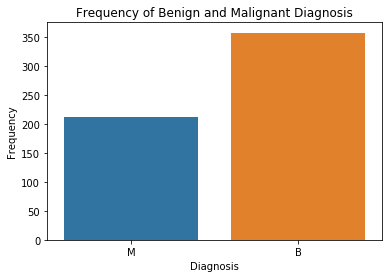

In [4]:
count,ax= plt.subplots()
ax= sns.countplot('diagnosis', data= breast_cancer)
ax.set_title('Frequency of Benign and Malignant Diagnosis')
ax.set_ylabel("Frequency")
ax.set_xlabel("Diagnosis")
plt.show()

In [5]:
breast_cancer.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

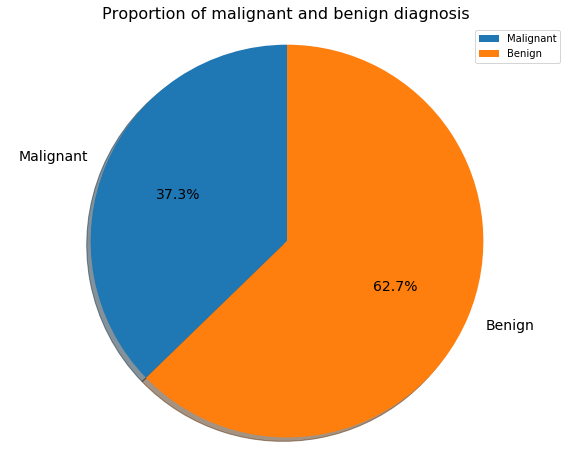

In [6]:
labels= "Malignant", "Benign"
sizes= [breast_cancer['diagnosis'][breast_cancer['diagnosis']== 'M'].count(), 
        breast_cancer['diagnosis'][breast_cancer['diagnosis']== 'B'].count()]

fig,ax= plt.subplots(figsize=(10,8))
ax.pie(sizes, labels= labels, autopct='%1.1f%%', shadow=True, startangle=90, 
       textprops={'fontsize':14})
ax.axis('equal')
plt.legend(loc='upper right')
plt.title("Proportion of malignant and benign diagnosis", size= 16)
plt.show()

#### 37.3% patients are diagnosed with Malignant cancer cell

### Q.3. Perform Bi-variate analysis on atleast 5-6 features

#### Scatter plot

C:\Users\bhave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


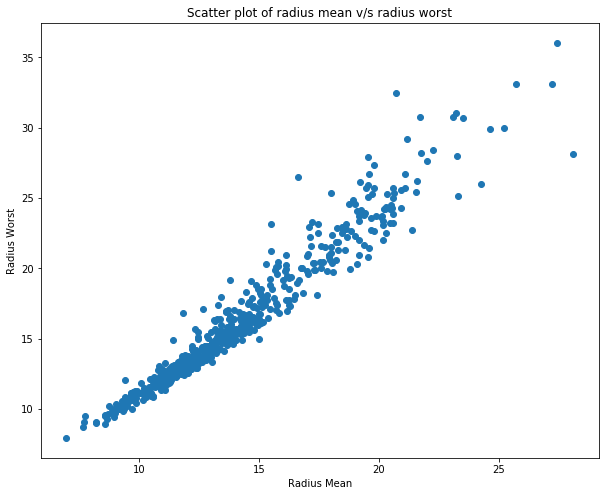

In [7]:
scatter= plt.figure(figsize=(10,8))
axes= scatter.add_subplot(1,1,1)
axes.scatter(breast_cancer['radius_mean'], breast_cancer['radius_worst'])
axes.set_title("Scatter plot of radius mean v/s radius worst")
axes.set_xlabel("Radius Mean")
axes.set_ylabel("Radius Worst")
scatter.show()

#### Box Plot (Discrete v/s Continuous)

C:\Users\bhave\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


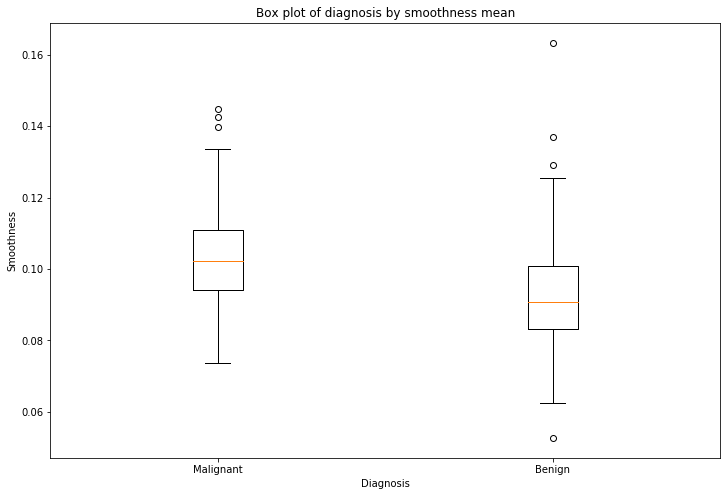

In [8]:
boxplot= plt.figure(figsize= (12,8))
axes= boxplot.add_subplot(1,1,1)
axes.boxplot([breast_cancer[breast_cancer['diagnosis']== 'M']['smoothness_mean'],
            breast_cancer[breast_cancer['diagnosis']== 'B']['smoothness_mean']],
            labels= ['Malignant', 'Benign'])
axes.set_title("Box plot of diagnosis by smoothness mean")
axes.set_xlabel("Diagnosis")
axes.set_ylabel("Smoothness")
boxplot.show()

#### lmplot for perimeter_mean v/s area_mean wrt diagnosis

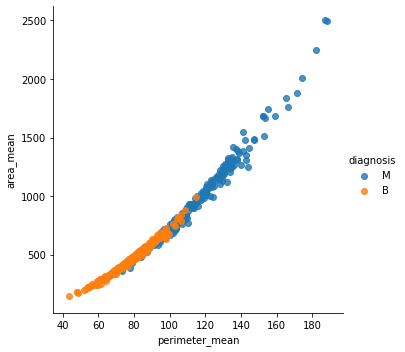

In [9]:
scatter= sns.lmplot(x= 'perimeter_mean', y= 'area_mean', data= breast_cancer, fit_reg= False, hue= 'diagnosis')
plt.show()

### Q.4. Perform Feature Engineering, atleast 2-3 features

In [10]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [11]:
# ID and Unnamed:32 are not useful. Therefore, we drop them

breast_cancer= breast_cancer.drop(['Unnamed: 32', 'id'], axis=1)
breast_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
# Mapping benign to 0 and Malignant to 1 in Diagnosis column

breast_cancer['diagnosis']= breast_cancer['diagnosis'].map({'M':1, 'B':0})
breast_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
breast_cancer.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Q.5. Check for the p-value in features

In [14]:
from scipy.stats import chi2_contingency

In [15]:
factors_paired= [(i,j) for i in breast_cancer.columns for j in breast_cancer.columns]
chi2, p_values= [], []
for f in factors_paired:
    if f[0]!= f[1]:
        chitest= chi2_contingency(pd.crosstab(breast_cancer[f[0]], breast_cancer[f[1]]))
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:
        chi2.append(0)
        p_values.append(0)
p1=np.array(p_values).reshape(31, 31)
p1 = pd.DataFrame(p1.round(2), index=breast_cancer.columns, columns= breast_cancer.columns)
p1

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,0.00,0.03,0.25,0.16,0.31,0.62,0.41,0.24,0.25,0.40,...,0.00,0.43,0.23,0.32,0.24,0.26,0.29,0.04,0.43,0.52
radius_mean,0.03,0.00,0.00,0.32,0.00,0.91,0.33,0.80,0.67,0.05,...,0.00,0.49,0.17,0.31,0.25,0.34,0.67,0.96,0.01,0.53
texture_mean,0.25,0.00,0.00,0.35,0.64,0.25,0.09,0.05,0.12,0.99,...,0.00,0.32,0.16,0.39,0.02,0.51,0.17,0.07,0.32,0.12
perimeter_mean,0.16,0.32,0.35,0.00,0.38,0.35,0.63,0.07,0.34,0.05,...,0.57,0.69,0.18,0.05,0.14,0.23,0.13,0.89,0.57,0.31
area_mean,0.31,0.00,0.64,0.38,0.00,0.07,0.14,0.59,0.48,0.17,...,0.31,0.13,0.09,0.27,0.08,0.40,0.36,0.35,0.10,0.26
smoothness_mean,0.62,0.91,0.25,0.35,0.07,0.00,0.06,0.80,0.21,0.99,...,0.93,0.07,0.42,0.26,0.00,0.72,0.59,0.11,0.12,0.02
compactness_mean,0.41,0.33,0.09,0.63,0.14,0.06,0.00,0.47,0.54,0.29,...,0.19,0.42,0.58,0.08,0.01,0.54,0.20,0.66,0.32,0.09
concavity_mean,0.24,0.80,0.05,0.07,0.59,0.80,0.47,0.00,0.00,0.88,...,0.40,0.35,0.33,0.22,0.18,0.29,0.00,0.00,0.17,0.37
concave points_mean,0.25,0.67,0.12,0.34,0.48,0.21,0.54,0.00,0.00,0.85,...,0.60,0.42,0.58,0.37,0.04,0.15,0.00,0.00,0.03,0.43
symmetry_mean,0.40,0.05,0.99,0.05,0.17,0.99,0.29,0.88,0.85,0.00,...,0.03,0.40,0.10,0.10,0.65,0.15,0.74,0.13,0.02,0.96


### Q.6. Normalize features using relevant scaling techniques

In [16]:
# Scaling the data
from sklearn import preprocessing

df= pd.DataFrame(preprocessing.scale(breast_cancer.iloc[:,1:32]))
df.columns= list(breast_cancer.iloc[:,1:32].columns)
df['diagnosis']= breast_cancer['diagnosis']
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1


### Q.7. In Logistic Regression try different cutoffs and do ROC, AUC, manually. 
### Also, apply RFE get the best 5 features and plot it.

In [17]:
X= df[df.columns[:-1]]
Y= pd.DataFrame(df[df.columns[-1]])
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [18]:
Y.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


#### Recursive Feature Selection

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

In [20]:
colnames= X.columns
ranks={}

def ranking(ranks, names):
    ranks= map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [21]:
lr= LinearRegression(normalize= True)
lr.fit(X,Y)
rfe= RFE(lr, n_features_to_select= 1, verbose= 3)
rfe.fit(X,Y)
ranks["RFE"]= ranking(list(map(float, rfe.ranking_)), colnames)

Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.

C:\Users\bhave\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
methods= sorted(ranks.keys())
for names in colnames:
    print("%s\t%s" % (names, "\t".join(map(str, [ranks[method][names] for method in methods]))))

radius_mean	3.0
texture_mean	21.0
perimeter_mean	14.0
area_mean	4.0
smoothness_mean	28.0
compactness_mean	6.0
concavity_mean	11.0
concave points_mean	5.0
symmetry_mean	27.0
fractal_dimension_mean	30.0
radius_se	9.0
texture_se	26.0
perimeter_se	10.0
area_se	19.0
smoothness_se	16.0
compactness_se	29.0
concavity_se	8.0
concave points_se	12.0
symmetry_se	24.0
fractal_dimension_se	22.0
radius_worst	1.0
texture_worst	13.0
perimeter_worst	17.0
area_worst	2.0
smoothness_worst	23.0
compactness_worst	25.0
concavity_worst	7.0
concave points_worst	20.0
symmetry_worst	18.0
fractal_dimension_worst	15.0


In [23]:
print(sorted(zip(map(lambda x: round(x, 2), rfe.ranking_), colnames)))

[(1, 'radius_worst'), (2, 'area_worst'), (3, 'radius_mean'), (4, 'area_mean'), (5, 'concave points_mean'), (6, 'compactness_mean'), (7, 'concavity_worst'), (8, 'concavity_se'), (9, 'radius_se'), (10, 'perimeter_se'), (11, 'concavity_mean'), (12, 'concave points_se'), (13, 'texture_worst'), (14, 'perimeter_mean'), (15, 'fractal_dimension_worst'), (16, 'smoothness_se'), (17, 'perimeter_worst'), (18, 'symmetry_worst'), (19, 'area_se'), (20, 'concave points_worst'), (21, 'texture_mean'), (22, 'fractal_dimension_se'), (23, 'smoothness_worst'), (24, 'symmetry_se'), (25, 'compactness_worst'), (26, 'texture_se'), (27, 'symmetry_mean'), (28, 'smoothness_mean'), (29, 'compactness_se'), (30, 'fractal_dimension_mean')]


#### Model Fitting

In [27]:
# # Predict labels for test data
# y_pred = logReg.predict(X_test)

In [28]:
# # Score method to get accuracy of model
# score = logReg.score(X_test,Y_test)
# print("Accuracy score of model:",score.round(2))

Accuracy score of model: 0.96


In [29]:
# # Precting Probabilities for test data
# Y_pred_proba = logReg.predict_proba(X_test)
# Y_pred_proba

array([[9.99964361e-01, 3.56385610e-05],
       [9.93483196e-01, 6.51680384e-03],
       [9.97861010e-01, 2.13898955e-03],
       [4.25639421e-08, 9.99999957e-01],
       [9.32056539e-01, 6.79434608e-02],
       [3.43242743e-03, 9.96567573e-01],
       [9.76774945e-01, 2.32250547e-02],
       [6.17453462e-01, 3.82546538e-01],
       [9.81398561e-01, 1.86014388e-02],
       [9.66445192e-01, 3.35548080e-02],
       [9.99947019e-01, 5.29812838e-05],
       [6.45995155e-03, 9.93540048e-01],
       [9.96401128e-09, 9.99999990e-01],
       [9.98321261e-01, 1.67873919e-03],
       [9.98797938e-01, 1.20206157e-03],
       [9.91398809e-01, 8.60119063e-03],
       [9.99480219e-01, 5.19781438e-04],
       [8.87576679e-02, 9.11242332e-01],
       [9.99989606e-01, 1.03943262e-05],
       [9.99250805e-01, 7.49194767e-04],
       [6.76017530e-08, 9.99999932e-01],
       [1.01701106e-08, 9.99999990e-01],
       [3.96525526e-01, 6.03474474e-01],
       [9.99999538e-01, 4.61543051e-07],
       [9.997897

#### The first column is the probability that the entry has the -1 label and the second column is the probability that the entry has the +1 label.

#### Precision and Recall 

In [30]:
# from sklearn.metrics import precision_recall_curve, precision_score, recall_score

In [39]:
# predicted_prob_df= pd.DataFrame(logReg.predict_proba(X_test))
# threshold_list= [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
# precision_list= []
# recall_list= []

# for i in threshold_list:
#     Y_test_pred= predicted_prob_df.applymap(lambda x: 1 if x>i else 0)
#     precision = precision_score(Y_test.reshape(Y_test.size,1),
#                                (Y_test_pred.iloc[:,1].as_matrix().reshape(Y_test_pred.iloc[:,1].as_matrix().size,1)))
#     precision_list.append(precision)
#     recall = recall_score(Y_test.reshape(Y_test.size,1),
#                          (Y_test_pred.iloc[:,1].as_matrix().reshape(Y_test_pred.iloc[:,1].as_matrix().size,1)))
#     recall_list.append(recall)
    

C:\Users\bhave\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
C:\Users\bhave\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


In [40]:
# thresh_df = pd.DataFrame()
# thresh_df['Threshold'] = threshold_list
# thresh_df['Precision'] = precision_list
# thresh_df['Recall'] = recall_list

In [32]:
# Y_test_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 2 columns):
0    171 non-null int64
1    171 non-null int64
dtypes: int64(2)
memory usage: 2.8 KB


In [33]:
# pd.DataFrame(Y_test).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 1 columns):
0    171 non-null int64
dtypes: int64(1)
memory usage: 1.5 KB


In [34]:
# Y_test_pred.iloc[:,1].as_matrix().reshape(Y_test_pred.iloc[:,1].as_matrix().size,1)

C:\Users\bhave\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [47]:
# thresh_df.head()

,Threshold,Precision,Recall
0,0.05,0.750000,0.984375
1,0.10,0.815789,0.968750
2,0.15,0.824324,0.953125
3,0.20,0.824324,0.953125
4,0.25,0.835616,0.953125


#### ROC AUC

In [25]:
import statsmodels.api as sm
model= sm.Logit(Y,X)
result= model.fit(method= 'ncg')

         Current function value: 0.023932
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 72
         Hessian evaluations: 35


C:\Users\bhave\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [26]:
Y.shape

(569, 1)

In [27]:
X.shape

(569, 30)

In [28]:
from sklearn.metrics import roc_curve, auc
X['pred']= result.predict(X)


In [29]:
X.shape

(569, 31)

In [30]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'pred'],
      dtype='object')

In [31]:
fpr, tpr, thresholds= roc_curve(Y, X['pred'])
roc_auc= auc(fpr, tpr)
print("area under the curve:", roc_auc)

area under the curve: 0.999656466360129


In [32]:
fpr

array([0.        , 0.        , 0.        , 0.00560224, 0.00560224,
       0.06722689, 0.06722689, 1.        ])

In [33]:
thresholds

array([1.00000000e+000, 1.00000000e+000, 6.11629730e-001, 4.28823467e-001,
       4.18458528e-001, 3.27937939e-003, 2.93943146e-003, 7.44182994e-141])

In [34]:
tpr

array([0.78301887, 0.79245283, 0.99056604, 0.99056604, 0.99528302,
       0.99528302, 1.        , 1.        ])

In [39]:
i= np.arange(len(tpr))
roc= pd.DataFrame({'fpr': pd.Series(fpr,index=i), 'tpr': pd.Series(fpr, index=i), '1-fpr': pd.Series(1-fpr, index=i),
                  'thresholds': pd.Series(thresholds, index=i), 'tf': pd.Series(tpr- (1-fpr), index=i)})
roc

,fpr,tpr,1-fpr,thresholds,tf
0,0.000000,0.000000,1.000000,1.000000e+00,-0.216981
1,0.000000,0.000000,1.000000,1.000000e+00,-0.207547
2,0.000000,0.000000,1.000000,6.116297e-01,-0.009434
3,0.005602,0.005602,0.994398,4.288235e-01,-0.003832
4,0.005602,0.005602,0.994398,4.184585e-01,0.000885
5,0.067227,0.067227,0.932773,3.279379e-03,0.062510
6,0.067227,0.067227,0.932773,2.939431e-03,0.067227
7,1.000000,1.000000,0.000000,7.441830e-141,1.000000


In [40]:
# Optimal cutoff {tpr- (1-fpr)}

roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,thresholds,tf
4,0.005602,0.005602,0.994398,0.418459,0.000885


[]

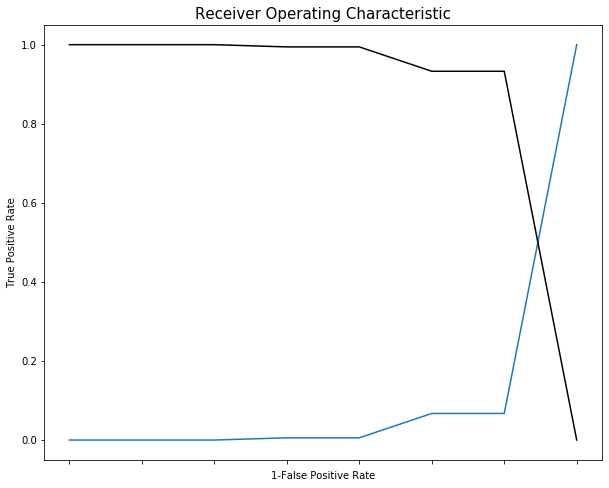

In [41]:
# Plot ROC-AUC

fig,ax= plt.subplots(figsize=(10,8))
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color='black')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic',fontsize=15)
ax.set_xticklabels([])

### Q.8. Perform Fine-tuning to the "C" parameter.

In [42]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X ,Y.values.ravel() ,test_size=0.3, stratify=Y,random_state=0)
logReg = LogisticRegression()

# Training the model and storing information learned from the data
logReg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
print("training set score: %f" % logReg.score(X_train, Y_train))
print('\n'"test set score: %f" % logReg.score(X_test,Y_test))

training set score: 0.997487

test set score: 0.982456


In [47]:
logReg100= LogisticRegression(C=100).fit(X_train, Y_train)
print("training set score: %f" % logReg100.score(X_train, Y_train))
print('\n'"test set score: %f" % logReg100.score(X_test,Y_test))

training set score: 1.000000

test set score: 0.953216


In [50]:
logReg_1= LogisticRegression(C=0.01).fit(X_train, Y_train)
print("training set score: %f" % logReg_1.score(X_train, Y_train))
print('\n'"test set score: %f" % logReg_1.score(X_test,Y_test))

training set score: 0.972362

test set score: 0.959064


In [51]:
logReg_2= LogisticRegression(C=0.001).fit(X_train, Y_train)
print("training set score: %f" % logReg_2.score(X_train, Y_train))
print('\n'"test set score: %f" % logReg_2.score(X_test,Y_test))

training set score: 0.957286

test set score: 0.906433
